In [264]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
pages = []
for i in range(0, 3):
    url = f"https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20Scientist&start={i}"
    pages.append(url)

In [153]:
Job_Title = []
for i in pages:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    title = soup.find_all(class_='css-193uk2c')
    for i in title:
        Job_Title.append(i.text.strip())

In [154]:
Location = []
for i in pages:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    location = soup.find_all(class_='css-16x61xq')
    for i in location:
        Location.append(i.text.strip())

In [155]:
Company = []
for i in pages:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    company = soup.find_all(class_='css-ipsyv7')
    for i in company:
        Company.append(i.text.strip())

In [156]:
links = []
for i in pages:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    job_link = soup.find_all("a",class_='css-o171kl')
    for i in job_link:
        if "wuzzuf.net/job" in i['href']:
            links.append(i['href'])

In [165]:
driver = webdriver.Chrome()
SKILL = []
for link in links:
    driver.get(link)
    driver.implicitly_wait(5)
    response = driver.page_source
    soup = BeautifulSoup(response, 'html.parser')
    skills = soup.find_all(class_="css-1vi25m1")
    SKILL.append([i.text for i in skills])
driver.close()

In [223]:
info = {'Job Title': Job_Title, 'Location': Location, 'Company': Company, 'Link': links, 'Skills': SKILL}
for i, company in enumerate(Company):
    Company[i] = company.split(" -")[0]
df = pd.DataFrame(info)

In [224]:
df

,Job Title,Location,Company,Link,Skills
0,Information Analyst – Data Scientist,"Maadi, Cairo, Egypt",Confidential,https://wuzzuf.net/jobs/p/ric2lbqwad48-informa...,"[IT/Software Development, analytical, Business..."
1,Data Scientist,"Sheikh Zayed, Giza, Egypt",Lumin,https://wuzzuf.net/jobs/p/bu1ksr9tke5x-data-sc...,"[IT/Software Development, Analyst/Research, En..."
2,Data Scientist,"Sheraton, Cairo, Egypt",Egabi FSI,https://wuzzuf.net/jobs/p/8oulgynroyag-data-sc...,"[IT/Software Development, Engineering - Teleco..."
3,Data Engineer,"Heliopolis, Cairo, Egypt",Misr Elhegaz Group,https://wuzzuf.net/jobs/p/xldbi3o0hwoa-data-en...,"[IT/Software Development, Analyst/Research, En..."
4,Senior Power BI Developer,"New Cairo, Cairo, Egypt",BI-Technologies,https://wuzzuf.net/jobs/p/baef4jt0fwjn-senior-...,"[IT/Software Development, Analyst/Research, En..."
5,ML Data Engineer,"Cairo, Egypt",Confidential,https://wuzzuf.net/jobs/p/xmrzj6xbs8mf-ml-data...,"[IT/Software Development, Engineering - Teleco..."
6,Graduate Talent Scientist,"Dubai, United Arab Emirates",Canonical,https://wuzzuf.net/jobs/p/g/juu0fcqzjkkk-gradu...,"[Customer Service/Support, IT/Software Develop..."
7,Data Engineer Team Lead,"Maadi, Cairo, Egypt",COB Solution,https://wuzzuf.net/jobs/p/nudjhsulxmyk-data-en...,"[IT/Software Development, Computer Science, En..."
8,Senior Full Stack Developer,"Cairo, Egypt",OrobaSoft,https://wuzzuf.net/jobs/p/nw8zdbhgmehp-senior-...,"[IT/Software Development, Engineering - Teleco..."
9,AI Engineer,"Maadi, Cairo, Egypt",ProVision Group,https://wuzzuf.net/jobs/p/qgconbaaa2gf-ai-engi...,"[IT/Software Development, AI, Computer Vision,..."


In [225]:
city_country = []
for location in df['Location']:
    city_country = location.split(",")[:]
    if len(city_country) == 3:
        df.loc[df['Location'] == location, 'City'] = city_country[-2].strip()
        df.loc[df['Location'] == location, 'Country'] = city_country[-1].strip()
    else:
        df.loc[df['Location'] == location, 'City'] = city_country[0].strip()
        df.loc[df['Location'] == location, 'Country'] = city_country[1].strip()
df.drop('Location', axis=1, inplace=True)

In [226]:
cols = list(df.columns)
cols.insert(cols.index("Company") + 1, cols.pop(cols.index("City")))
df = df[cols]
cols = list(df.columns)
cols.insert(cols.index("City") + 1, cols.pop(cols.index("Country")))
df = df[cols]

In [234]:
skill_count = {}
for job in SKILL:
    for skill in job:
        if skill in skill_count:
            skill_count[skill] += 1
        else:
            skill_count[skill] = 1
most_demanded_skills=sorted(skill_count.items(), key=lambda x: x[1], reverse=True)
most_demanded_skills

[('IT/Software Development', 20),
 ('Engineering - Telecom/Technology', 14),
 ('Computer Science', 13),
 ('Information Technology (IT)', 12),
 ('SQL', 11),
 ('Engineering', 8),
 ('Python', 7),
 ('Software Development', 7),
 ('Data Science', 5),
 ('Computer Engineering', 5),
 ('Microsoft Office', 5),
 ('Hadoop', 4),
 ('Communication Skills', 4),
 ('Administration', 4),
 ('Software Engineering', 4),
 ('Sales', 4),
 ('Sales Skills', 4),
 ('Analysis', 3),
 ('Data', 3),
 ('Analyst/Research', 3),
 ('Machine Learning', 3),
 ('Programming', 3),
 ('Cloudera', 3),
 ('Software', 3),
 ('javaScript', 3),
 ('Sales/Retail', 3),
 ('Sales Target', 3),
 ('Customer Service', 3),
 ('Customer Support', 3),
 ('Customer Care', 3),
 ('Marketing', 3),
 ('Business Development', 3),
 ('Data Analysis', 2),
 ('Statistics', 2),
 ('AWS', 2),
 ('Spark', 2),
 ('Power BI', 2),
 ('SSRS', 2),
 ('BI', 2),
 ('HDFS', 2),
 ('Azure Pipelines', 2),
 ('design', 2),
 ('management', 2),
 ('Java', 2),
 ('HTML', 2),
 ('CSS', 2),
 (

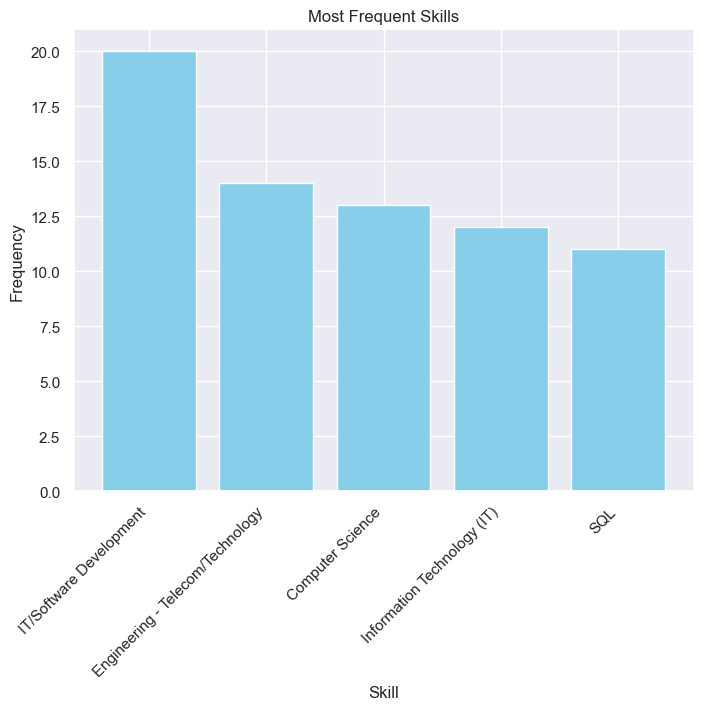

In [256]:
items = [skill for skill, count in most_demanded_skills[:5]]
counts = [count for skill, count in most_demanded_skills[:5]]
plt.figure(figsize=(8, 6))
plt.bar(items, counts, color='skyblue')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.title('Most Frequent Skills')
plt.xticks(rotation=45, ha='right')
plt.show()

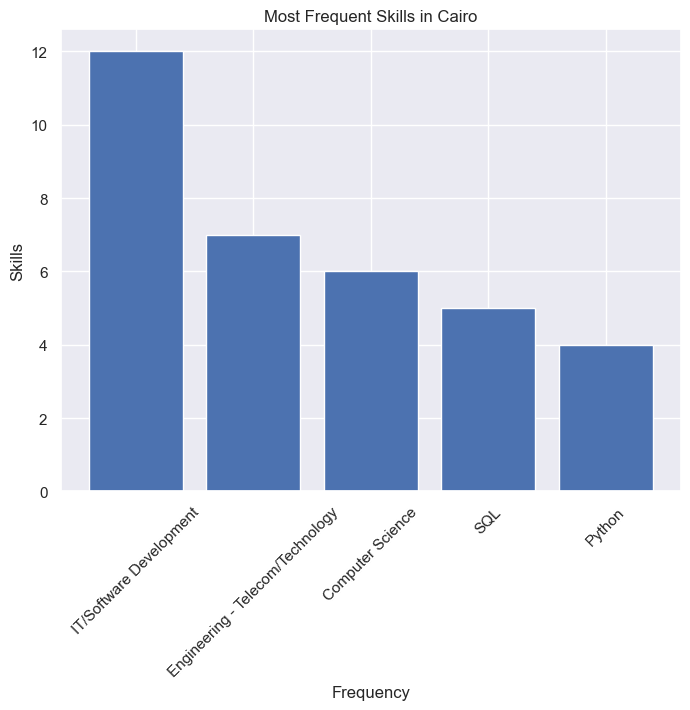

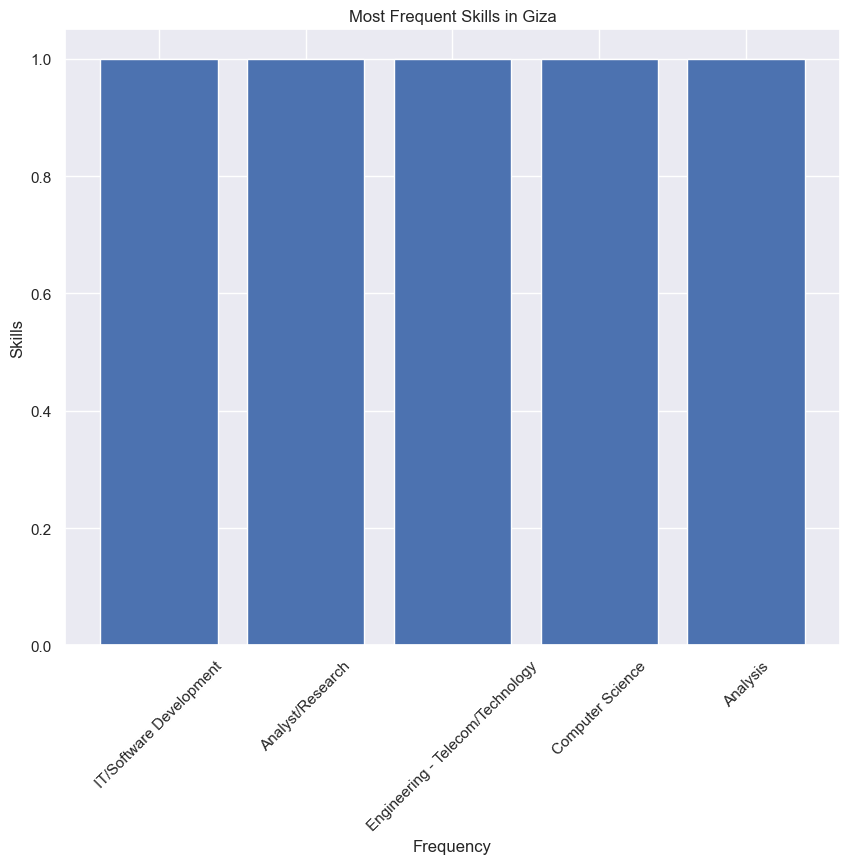

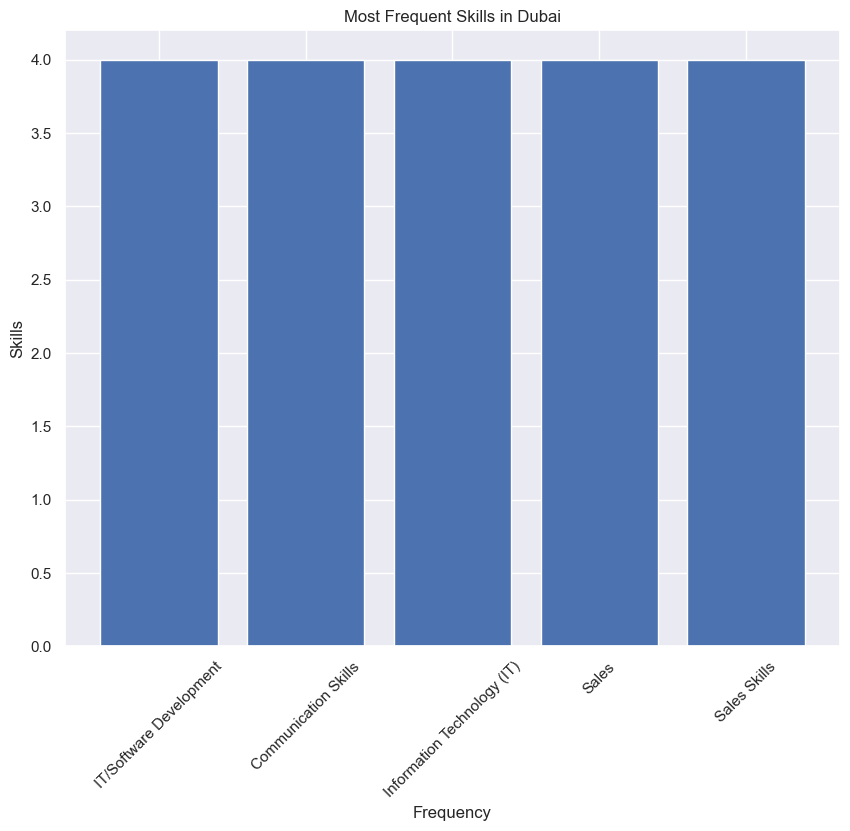

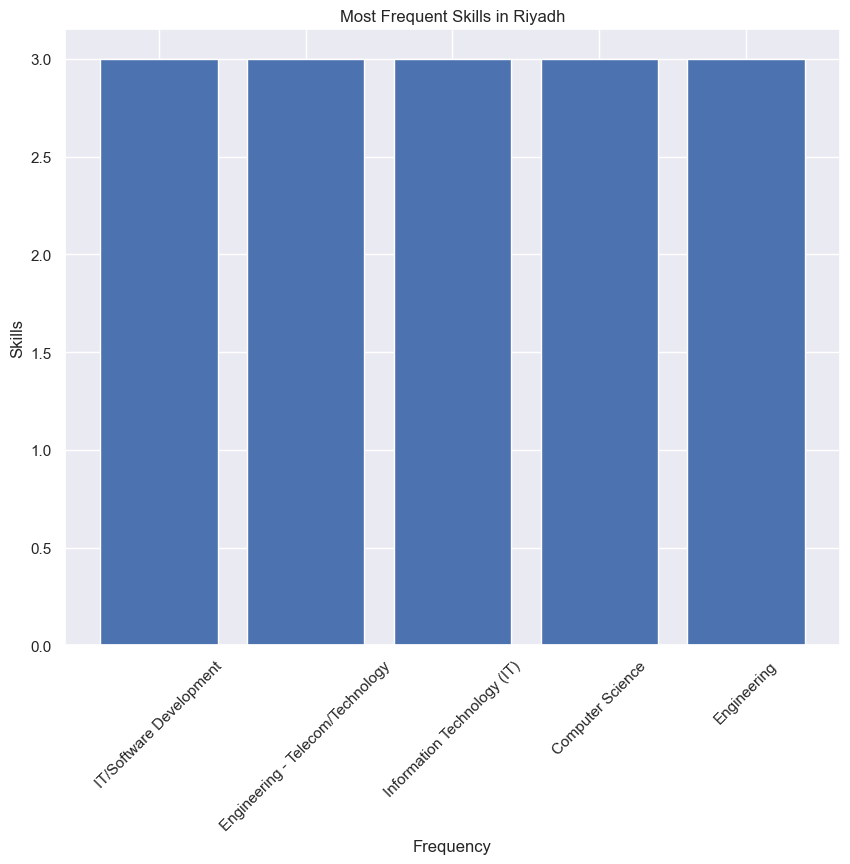

In [257]:
plt.figure(figsize=(8, 6))
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    skills = [skill for skill_list in city_df['Skills'] for skill in skill_list]
    skill_count = {}
    for skill in skills:
        if skill in skill_count:
            skill_count[skill] += 1
        else:
            skill_count[skill] = 1
    most_frequent_skills = sorted(skill_count.items(), key=lambda x: x[1], reverse=True)[:5]
    x_values = [count for skill, count in most_frequent_skills]
    y_values = [skill for skill, count in most_frequent_skills]
    plt.bar(y_values, x_values)
    plt.xlabel('Frequency')
    plt.ylabel('Skills')
    plt.title(f'Most Frequent Skills in {city}')
    plt.xticks(rotation=45)
    plt.show()

In [258]:
df

,Job Title,Company,City,Country,Link,Skills
0,Information Analyst – Data Scientist,Confidential,Cairo,Egypt,https://wuzzuf.net/jobs/p/ric2lbqwad48-informa...,"[IT/Software Development, analytical, Business..."
1,Data Scientist,Lumin,Giza,Egypt,https://wuzzuf.net/jobs/p/bu1ksr9tke5x-data-sc...,"[IT/Software Development, Analyst/Research, En..."
2,Data Scientist,Egabi FSI,Cairo,Egypt,https://wuzzuf.net/jobs/p/8oulgynroyag-data-sc...,"[IT/Software Development, Engineering - Teleco..."
3,Data Engineer,Misr Elhegaz Group,Cairo,Egypt,https://wuzzuf.net/jobs/p/xldbi3o0hwoa-data-en...,"[IT/Software Development, Analyst/Research, En..."
4,Senior Power BI Developer,BI-Technologies,Cairo,Egypt,https://wuzzuf.net/jobs/p/baef4jt0fwjn-senior-...,"[IT/Software Development, Analyst/Research, En..."
5,ML Data Engineer,Confidential,Cairo,Egypt,https://wuzzuf.net/jobs/p/xmrzj6xbs8mf-ml-data...,"[IT/Software Development, Engineering - Teleco..."
6,Graduate Talent Scientist,Canonical,Dubai,United Arab Emirates,https://wuzzuf.net/jobs/p/g/juu0fcqzjkkk-gradu...,"[Customer Service/Support, IT/Software Develop..."
7,Data Engineer Team Lead,COB Solution,Cairo,Egypt,https://wuzzuf.net/jobs/p/nudjhsulxmyk-data-en...,"[IT/Software Development, Computer Science, En..."
8,Senior Full Stack Developer,OrobaSoft,Cairo,Egypt,https://wuzzuf.net/jobs/p/nw8zdbhgmehp-senior-...,"[IT/Software Development, Engineering - Teleco..."
9,AI Engineer,ProVision Group,Cairo,Egypt,https://wuzzuf.net/jobs/p/qgconbaaa2gf-ai-engi...,"[IT/Software Development, AI, Computer Vision,..."


In [263]:
df.to_csv('data_scientist_wuzzuf_jobs.csv',index=False,header=True,encoding='utf-8')